In [430]:
import pandas as pd
import numpy as np
import datetime
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
import nltk
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor


from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier

#import xgboost as xgb

#import lightgbm as lgb

from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV

from math import sqrt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from scipy import stats
from sklearn.model_selection import ShuffleSplit

In [431]:
df = pd.read_csv('twitter_data(all).csv')
df

,Date,ID,Name,Text,Hashtags,User Mentions,Symbols,Media,Source,Location,Follower count,Friends count,Favorite count,Retweet count,Status count,Industries
0,2021-03-22 10:46:46,1373949268164153345,YouTube,@StarlightWarm and beautiful 🌹,NaN,Don't touch my tea,NaN,NaN,Twitter Web App,"San Bruno, CA",73105218.0,1202.0,0.0,0.0,32085.0,Tech Company
1,2021-03-22 10:46:32,1373949209187995652,YouTube,@TheeAngryWalnut Spreading love everywhere!,NaN,😤 THEE ANGRY WALNUT IS HERE😤,NaN,NaN,Twitter Web App,"San Bruno, CA",73105218.0,1202.0,2.0,0.0,32085.0,Tech Company
2,2021-03-22 10:46:05,1373949093886582784,YouTube,@Maeliosa8 💕💕,NaN,Maeliosa,NaN,NaN,Twitter Web App,"San Bruno, CA",73105218.0,1202.0,0.0,0.0,32085.0,Tech Company
3,2021-03-22 06:00:04,1373877114743705602,YouTube,💞 The adventures of Natsumi and Haru! These si...,NaN,NaN,NaN,NaN,Sprinklr,"San Bruno, CA",73105218.0,1202.0,1400.0,99.0,32085.0,Tech Company
4,2021-03-21 19:38:33,1373720706689638401,YouTube,@LindseyMarsland Relatable https://t.co/FaSUCg...,NaN,Lindsey Marsland (she/her),NaN,http://pbs.twimg.com/tweet_video_thumb/ExBvsHI...,Twitter Web App,"San Bruno, CA",73105218.0,1202.0,3.0,0.0,32085.0,Tech Company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16081,2020-05-01 03:02:37,1256056403715735554,Gal Gadot,@LillyAspell @WonderWomanFilm @PattyJenks @DCC...,NaN,"Lilly Aspell,Wonder Woman 1984,Patty Jenkins,D...",NaN,NaN,Twitter for iPhone,NaN,2708999.0,169.0,1137.0,51.0,1758.0,Actor
16082,2020-05-01 02:32:38,1256048857625976834,Gal Gadot,@GDIGM Thank you legend!! Sending much love yo...,NaN,GeenaDavisInstitute,NaN,NaN,Twitter for iPhone,NaN,2708999.0,169.0,508.0,24.0,1758.0,Actor
16083,2020-05-01 02:31:38,1256048604088688640,Gal Gadot,@PattyJenks Jenkins !!!! I love you so much!! ...,NaN,Patty Jenkins,NaN,NaN,Twitter for iPhone,NaN,2708999.0,169.0,4947.0,325.0,1758.0,Actor
16084,2020-04-22 22:30:54,1253088919354134528,Gal Gadot,I’m so moved seeing everyones images of earth ...,earthday,NaN,NaN,NaN,Twitter for iPhone,NaN,2708999.0,169.0,17497.0,1175.0,1758.0,Actor


In [432]:
df['Date'] = pd.to_datetime(df['Date'])
df['ID'] = df['ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16086 entries, 0 to 16085
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            16086 non-null  datetime64[ns]
 1   ID              16086 non-null  object        
 2   Name            16086 non-null  object        
 3   Text            16086 non-null  object        
 4   Hashtags        3474 non-null   object        
 5   User Mentions   8378 non-null   object        
 6   Symbols         15 non-null     object        
 7   Media           2643 non-null   object        
 8   Source          16086 non-null  object        
 9   Location        11390 non-null  object        
 10  Follower count  16086 non-null  float64       
 11  Friends count   16086 non-null  float64       
 12  Favorite count  16086 non-null  float64       
 13  Retweet count   16086 non-null  float64       
 14  Status count    16086 non-null  float64       
 15  In

In [433]:
# Filter out reply tweets
data = df.loc[~((df.Text.str.match('@.+\s')) & (df['Favorite count'] < 10) & (df['Retweet count'] < 10))]
data.reset_index(inplace=True, drop=True)
data

,Date,ID,Name,Text,Hashtags,User Mentions,Symbols,Media,Source,Location,Follower count,Friends count,Favorite count,Retweet count,Status count,Industries
0,2021-03-22 06:00:04,1373877114743705602,YouTube,💞 The adventures of Natsumi and Haru! These si...,NaN,NaN,NaN,NaN,Sprinklr,"San Bruno, CA",73105218.0,1202.0,1400.0,99.0,32085.0,Tech Company
1,2021-03-21 13:55:36,1373634398919262210,YouTube,"@MKBHD 10/10, would sign up again 🏆",NaN,Marques Brownlee,NaN,NaN,Twitter Web App,"San Bruno, CA",73105218.0,1202.0,6888.0,43.0,32085.0,Tech Company
2,2021-03-21 11:00:01,1373590213818212352,YouTube,💗Chocolate 💗\n 💗 Cappuccino 💗\n 💗C...,NaN,NaN,NaN,NaN,Sprinklr,"San Bruno, CA",73105218.0,1202.0,1584.0,128.0,32085.0,Tech Company
3,2021-03-20 23:54:48,1373422805199458305,YouTube,@OBB @ddlovato @Variety @decider @ratty @SB_Pr...,demiDWTD,"OBB,Demi Lovato,Variety,Decider,Michael D. Rat...",NaN,NaN,Twitter Web App,"San Bruno, CA",73105218.0,1202.0,71.0,18.0,32085.0,Tech Company
4,2021-03-20 23:31:40,1373416985439047681,YouTube,@VoytekPavlik https://t.co/WFAwYTuXoZ,NaN,Voytek Pavlik,NaN,http://pbs.twimg.com/tweet_video_thumb/Ew9bdXS...,Twitter Web App,"San Bruno, CA",73105218.0,1202.0,15.0,0.0,32085.0,Tech Company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12596,2020-05-01 03:02:37,1256056403715735554,Gal Gadot,@LillyAspell @WonderWomanFilm @PattyJenks @DCC...,NaN,"Lilly Aspell,Wonder Woman 1984,Patty Jenkins,D...",NaN,NaN,Twitter for iPhone,NaN,2708999.0,169.0,1137.0,51.0,1758.0,Actor
12597,2020-05-01 02:32:38,1256048857625976834,Gal Gadot,@GDIGM Thank you legend!! Sending much love yo...,NaN,GeenaDavisInstitute,NaN,NaN,Twitter for iPhone,NaN,2708999.0,169.0,508.0,24.0,1758.0,Actor
12598,2020-05-01 02:31:38,1256048604088688640,Gal Gadot,@PattyJenks Jenkins !!!! I love you so much!! ...,NaN,Patty Jenkins,NaN,NaN,Twitter for iPhone,NaN,2708999.0,169.0,4947.0,325.0,1758.0,Actor
12599,2020-04-22 22:30:54,1253088919354134528,Gal Gadot,I’m so moved seeing everyones images of earth ...,earthday,NaN,NaN,NaN,Twitter for iPhone,NaN,2708999.0,169.0,17497.0,1175.0,1758.0,Actor


In [434]:
# create target
df1 = data.copy()
df1['Engagement'] = df1['Retweet count'] + df1['Favorite count']
df1
#df1['Engagement_class'] = np.where((df1['Engagement']> df1['Engagement'].median()), 1, 0)

# Drop unnecessary columns
df1.drop(columns = ['Location', 'Source', 'Symbols', 'ID', 'Name'], 
         inplace=True)
df1

,Date,Text,Hashtags,User Mentions,Media,Follower count,Friends count,Favorite count,Retweet count,Status count,Industries,Engagement
0,2021-03-22 06:00:04,💞 The adventures of Natsumi and Haru! These si...,NaN,NaN,NaN,73105218.0,1202.0,1400.0,99.0,32085.0,Tech Company,1499.0
1,2021-03-21 13:55:36,"@MKBHD 10/10, would sign up again 🏆",NaN,Marques Brownlee,NaN,73105218.0,1202.0,6888.0,43.0,32085.0,Tech Company,6931.0
2,2021-03-21 11:00:01,💗Chocolate 💗\n 💗 Cappuccino 💗\n 💗C...,NaN,NaN,NaN,73105218.0,1202.0,1584.0,128.0,32085.0,Tech Company,1712.0
3,2021-03-20 23:54:48,@OBB @ddlovato @Variety @decider @ratty @SB_Pr...,demiDWTD,"OBB,Demi Lovato,Variety,Decider,Michael D. Rat...",NaN,73105218.0,1202.0,71.0,18.0,32085.0,Tech Company,89.0
4,2021-03-20 23:31:40,@VoytekPavlik https://t.co/WFAwYTuXoZ,NaN,Voytek Pavlik,http://pbs.twimg.com/tweet_video_thumb/Ew9bdXS...,73105218.0,1202.0,15.0,0.0,32085.0,Tech Company,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12596,2020-05-01 03:02:37,@LillyAspell @WonderWomanFilm @PattyJenks @DCC...,NaN,"Lilly Aspell,Wonder Woman 1984,Patty Jenkins,D...",NaN,2708999.0,169.0,1137.0,51.0,1758.0,Actor,1188.0
12597,2020-05-01 02:32:38,@GDIGM Thank you legend!! Sending much love yo...,NaN,GeenaDavisInstitute,NaN,2708999.0,169.0,508.0,24.0,1758.0,Actor,532.0
12598,2020-05-01 02:31:38,@PattyJenks Jenkins !!!! I love you so much!! ...,NaN,Patty Jenkins,NaN,2708999.0,169.0,4947.0,325.0,1758.0,Actor,5272.0
12599,2020-04-22 22:30:54,I’m so moved seeing everyones images of earth ...,earthday,NaN,NaN,2708999.0,169.0,17497.0,1175.0,1758.0,Actor,18672.0


In [435]:
# Extract time and day of week from Date column

def greeting(hours):
    if hours in range(5,12):
        h = 'morning'
    elif hours in range(12,18):
        h = 'afternoon'
    elif hours in range(18,21):
        h = 'evening'
    else:
        h = 'night'
    return h

def name_the_day(day):
    if day == 0:
        return "Monday"
    elif day == 1:
        return "Tuesday"
    elif day == 2:
        return "Wednesday"
    elif day == 3:
        return "Thursday"
    elif day == 4:
        return "Friday"
    elif day == 5:
        return "Saturday"
    else:
        return "Sunday"
    

df1['Time'] = data['Date'].dt.hour.apply(greeting)
df1['Day of Weeks'] = data['Date'].dt.dayofweek.apply(name_the_day)
df1

,Date,Text,Hashtags,User Mentions,Media,Follower count,Friends count,Favorite count,Retweet count,Status count,Industries,Engagement,Time,Day of Weeks
0,2021-03-22 06:00:04,💞 The adventures of Natsumi and Haru! These si...,NaN,NaN,NaN,73105218.0,1202.0,1400.0,99.0,32085.0,Tech Company,1499.0,morning,Monday
1,2021-03-21 13:55:36,"@MKBHD 10/10, would sign up again 🏆",NaN,Marques Brownlee,NaN,73105218.0,1202.0,6888.0,43.0,32085.0,Tech Company,6931.0,afternoon,Sunday
2,2021-03-21 11:00:01,💗Chocolate 💗\n 💗 Cappuccino 💗\n 💗C...,NaN,NaN,NaN,73105218.0,1202.0,1584.0,128.0,32085.0,Tech Company,1712.0,morning,Sunday
3,2021-03-20 23:54:48,@OBB @ddlovato @Variety @decider @ratty @SB_Pr...,demiDWTD,"OBB,Demi Lovato,Variety,Decider,Michael D. Rat...",NaN,73105218.0,1202.0,71.0,18.0,32085.0,Tech Company,89.0,night,Saturday
4,2021-03-20 23:31:40,@VoytekPavlik https://t.co/WFAwYTuXoZ,NaN,Voytek Pavlik,http://pbs.twimg.com/tweet_video_thumb/Ew9bdXS...,73105218.0,1202.0,15.0,0.0,32085.0,Tech Company,15.0,night,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12596,2020-05-01 03:02:37,@LillyAspell @WonderWomanFilm @PattyJenks @DCC...,NaN,"Lilly Aspell,Wonder Woman 1984,Patty Jenkins,D...",NaN,2708999.0,169.0,1137.0,51.0,1758.0,Actor,1188.0,night,Friday
12597,2020-05-01 02:32:38,@GDIGM Thank you legend!! Sending much love yo...,NaN,GeenaDavisInstitute,NaN,2708999.0,169.0,508.0,24.0,1758.0,Actor,532.0,night,Friday
12598,2020-05-01 02:31:38,@PattyJenks Jenkins !!!! I love you so much!! ...,NaN,Patty Jenkins,NaN,2708999.0,169.0,4947.0,325.0,1758.0,Actor,5272.0,night,Friday
12599,2020-04-22 22:30:54,I’m so moved seeing everyones images of earth ...,earthday,NaN,NaN,2708999.0,169.0,17497.0,1175.0,1758.0,Actor,18672.0,night,Wednesday


In [436]:
# Create Hashtag Count and length

def hashtags_count(hashs):
    if pd.notna(hashs) :
        hashs = str(hashs)
        hashs = hashs.split(',')
        counts = len(hashs)
    else:
        counts = 0
    return counts

def length_h(hashs):
    if pd.notna(hashs):
        hashs = str(hashs).replace(',','')
        count = len(list(hashs))
        return count
    else:
        return 0

df1['hashtags_count'] = df1.Hashtags.apply(hashtags_count)
df1['length_hashtag'] = df1.Hashtags.apply(length_h)

df1

,Date,Text,Hashtags,User Mentions,Media,Follower count,Friends count,Favorite count,Retweet count,Status count,Industries,Engagement,Time,Day of Weeks,hashtags_count,length_hashtag
0,2021-03-22 06:00:04,💞 The adventures of Natsumi and Haru! These si...,NaN,NaN,NaN,73105218.0,1202.0,1400.0,99.0,32085.0,Tech Company,1499.0,morning,Monday,0,0
1,2021-03-21 13:55:36,"@MKBHD 10/10, would sign up again 🏆",NaN,Marques Brownlee,NaN,73105218.0,1202.0,6888.0,43.0,32085.0,Tech Company,6931.0,afternoon,Sunday,0,0
2,2021-03-21 11:00:01,💗Chocolate 💗\n 💗 Cappuccino 💗\n 💗C...,NaN,NaN,NaN,73105218.0,1202.0,1584.0,128.0,32085.0,Tech Company,1712.0,morning,Sunday,0,0
3,2021-03-20 23:54:48,@OBB @ddlovato @Variety @decider @ratty @SB_Pr...,demiDWTD,"OBB,Demi Lovato,Variety,Decider,Michael D. Rat...",NaN,73105218.0,1202.0,71.0,18.0,32085.0,Tech Company,89.0,night,Saturday,1,8
4,2021-03-20 23:31:40,@VoytekPavlik https://t.co/WFAwYTuXoZ,NaN,Voytek Pavlik,http://pbs.twimg.com/tweet_video_thumb/Ew9bdXS...,73105218.0,1202.0,15.0,0.0,32085.0,Tech Company,15.0,night,Saturday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12596,2020-05-01 03:02:37,@LillyAspell @WonderWomanFilm @PattyJenks @DCC...,NaN,"Lilly Aspell,Wonder Woman 1984,Patty Jenkins,D...",NaN,2708999.0,169.0,1137.0,51.0,1758.0,Actor,1188.0,night,Friday,0,0
12597,2020-05-01 02:32:38,@GDIGM Thank you legend!! Sending much love yo...,NaN,GeenaDavisInstitute,NaN,2708999.0,169.0,508.0,24.0,1758.0,Actor,532.0,night,Friday,0,0
12598,2020-05-01 02:31:38,@PattyJenks Jenkins !!!! I love you so much!! ...,NaN,Patty Jenkins,NaN,2708999.0,169.0,4947.0,325.0,1758.0,Actor,5272.0,night,Friday,0,0
12599,2020-04-22 22:30:54,I’m so moved seeing everyones images of earth ...,earthday,NaN,NaN,2708999.0,169.0,17497.0,1175.0,1758.0,Actor,18672.0,night,Wednesday,1,8


In [437]:
# Create user_mention Count

def mention_count(x):
    if pd.notna(x):
        x = str(x)
        x = x.split(',')
        counts = len(x)
    else:
        counts = 0
    return counts

df1['user_mentions_count'] = df1['User Mentions'].apply(mention_count)
df1

,Date,Text,Hashtags,User Mentions,Media,Follower count,Friends count,Favorite count,Retweet count,Status count,Industries,Engagement,Time,Day of Weeks,hashtags_count,length_hashtag,user_mentions_count
0,2021-03-22 06:00:04,💞 The adventures of Natsumi and Haru! These si...,NaN,NaN,NaN,73105218.0,1202.0,1400.0,99.0,32085.0,Tech Company,1499.0,morning,Monday,0,0,0
1,2021-03-21 13:55:36,"@MKBHD 10/10, would sign up again 🏆",NaN,Marques Brownlee,NaN,73105218.0,1202.0,6888.0,43.0,32085.0,Tech Company,6931.0,afternoon,Sunday,0,0,1
2,2021-03-21 11:00:01,💗Chocolate 💗\n 💗 Cappuccino 💗\n 💗C...,NaN,NaN,NaN,73105218.0,1202.0,1584.0,128.0,32085.0,Tech Company,1712.0,morning,Sunday,0,0,0
3,2021-03-20 23:54:48,@OBB @ddlovato @Variety @decider @ratty @SB_Pr...,demiDWTD,"OBB,Demi Lovato,Variety,Decider,Michael D. Rat...",NaN,73105218.0,1202.0,71.0,18.0,32085.0,Tech Company,89.0,night,Saturday,1,8,6
4,2021-03-20 23:31:40,@VoytekPavlik https://t.co/WFAwYTuXoZ,NaN,Voytek Pavlik,http://pbs.twimg.com/tweet_video_thumb/Ew9bdXS...,73105218.0,1202.0,15.0,0.0,32085.0,Tech Company,15.0,night,Saturday,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12596,2020-05-01 03:02:37,@LillyAspell @WonderWomanFilm @PattyJenks @DCC...,NaN,"Lilly Aspell,Wonder Woman 1984,Patty Jenkins,D...",NaN,2708999.0,169.0,1137.0,51.0,1758.0,Actor,1188.0,night,Friday,0,0,5
12597,2020-05-01 02:32:38,@GDIGM Thank you legend!! Sending much love yo...,NaN,GeenaDavisInstitute,NaN,2708999.0,169.0,508.0,24.0,1758.0,Actor,532.0,night,Friday,0,0,1
12598,2020-05-01 02:31:38,@PattyJenks Jenkins !!!! I love you so much!! ...,NaN,Patty Jenkins,NaN,2708999.0,169.0,4947.0,325.0,1758.0,Actor,5272.0,night,Friday,0,0,1
12599,2020-04-22 22:30:54,I’m so moved seeing everyones images of earth ...,earthday,NaN,NaN,2708999.0,169.0,17497.0,1175.0,1758.0,Actor,18672.0,night,Wednesday,1,8,0


In [438]:
# Dummy if media exist
def media_dummy(x):
    if pd.notna(x):
        return 1
    else:
        return 0

df1['media_dummy'] = df1['Media'].apply(media_dummy)
df1

,Date,Text,Hashtags,User Mentions,Media,Follower count,Friends count,Favorite count,Retweet count,Status count,Industries,Engagement,Time,Day of Weeks,hashtags_count,length_hashtag,user_mentions_count,media_dummy
0,2021-03-22 06:00:04,💞 The adventures of Natsumi and Haru! These si...,NaN,NaN,NaN,73105218.0,1202.0,1400.0,99.0,32085.0,Tech Company,1499.0,morning,Monday,0,0,0,0
1,2021-03-21 13:55:36,"@MKBHD 10/10, would sign up again 🏆",NaN,Marques Brownlee,NaN,73105218.0,1202.0,6888.0,43.0,32085.0,Tech Company,6931.0,afternoon,Sunday,0,0,1,0
2,2021-03-21 11:00:01,💗Chocolate 💗\n 💗 Cappuccino 💗\n 💗C...,NaN,NaN,NaN,73105218.0,1202.0,1584.0,128.0,32085.0,Tech Company,1712.0,morning,Sunday,0,0,0,0
3,2021-03-20 23:54:48,@OBB @ddlovato @Variety @decider @ratty @SB_Pr...,demiDWTD,"OBB,Demi Lovato,Variety,Decider,Michael D. Rat...",NaN,73105218.0,1202.0,71.0,18.0,32085.0,Tech Company,89.0,night,Saturday,1,8,6,0
4,2021-03-20 23:31:40,@VoytekPavlik https://t.co/WFAwYTuXoZ,NaN,Voytek Pavlik,http://pbs.twimg.com/tweet_video_thumb/Ew9bdXS...,73105218.0,1202.0,15.0,0.0,32085.0,Tech Company,15.0,night,Saturday,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12596,2020-05-01 03:02:37,@LillyAspell @WonderWomanFilm @PattyJenks @DCC...,NaN,"Lilly Aspell,Wonder Woman 1984,Patty Jenkins,D...",NaN,2708999.0,169.0,1137.0,51.0,1758.0,Actor,1188.0,night,Friday,0,0,5,0
12597,2020-05-01 02:32:38,@GDIGM Thank you legend!! Sending much love yo...,NaN,GeenaDavisInstitute,NaN,2708999.0,169.0,508.0,24.0,1758.0,Actor,532.0,night,Friday,0,0,1,0
12598,2020-05-01 02:31:38,@PattyJenks Jenkins !!!! I love you so much!! ...,NaN,Patty Jenkins,NaN,2708999.0,169.0,4947.0,325.0,1758.0,Actor,5272.0,night,Friday,0,0,1,0
12599,2020-04-22 22:30:54,I’m so moved seeing everyones images of earth ...,earthday,NaN,NaN,2708999.0,169.0,17497.0,1175.0,1758.0,Actor,18672.0,night,Wednesday,1,8,0,0


In [439]:
#Emoji counts
def count_emoji(text):
    emoji = re.compile('[\\u203C-\\u3299\\U0001F000-\\U0001F644]')
    emo = list(filter(emoji.match, text))
    count = len(emo)
    return count
df1['emoji_count'] = df1['Text'].apply(count_emoji)

In [440]:
df1['word_count'] = df['Text'].str.split().str.len()

In [441]:
df1.columns

Index(['Date', 'Text', 'Hashtags', 'User Mentions', 'Media', 'Follower count',
       'Friends count', 'Favorite count', 'Retweet count', 'Status count',
       'Industries', 'Engagement', 'Time', 'Day of Weeks', 'hashtags_count',
       'length_hashtag', 'user_mentions_count', 'media_dummy', 'emoji_count',
       'word_count'],
      dtype='object')

In [442]:
# Dummy Industries, Time and Day of Weeks
df1 = pd.get_dummies(df1, columns=['Industries', 'Time', 'Day of Weeks'])
df1

,Date,Text,Hashtags,User Mentions,Media,Follower count,Friends count,Favorite count,Retweet count,Status count,...,Time_evening,Time_morning,Time_night,Day of Weeks_Friday,Day of Weeks_Monday,Day of Weeks_Saturday,Day of Weeks_Sunday,Day of Weeks_Thursday,Day of Weeks_Tuesday,Day of Weeks_Wednesday
0,2021-03-22 06:00:04,💞 The adventures of Natsumi and Haru! These si...,NaN,NaN,NaN,73105218.0,1202.0,1400.0,99.0,32085.0,...,0,1,0,0,1,0,0,0,0,0
1,2021-03-21 13:55:36,"@MKBHD 10/10, would sign up again 🏆",NaN,Marques Brownlee,NaN,73105218.0,1202.0,6888.0,43.0,32085.0,...,0,0,0,0,0,0,1,0,0,0
2,2021-03-21 11:00:01,💗Chocolate 💗\n 💗 Cappuccino 💗\n 💗C...,NaN,NaN,NaN,73105218.0,1202.0,1584.0,128.0,32085.0,...,0,1,0,0,0,0,1,0,0,0
3,2021-03-20 23:54:48,@OBB @ddlovato @Variety @decider @ratty @SB_Pr...,demiDWTD,"OBB,Demi Lovato,Variety,Decider,Michael D. Rat...",NaN,73105218.0,1202.0,71.0,18.0,32085.0,...,0,0,1,0,0,1,0,0,0,0
4,2021-03-20 23:31:40,@VoytekPavlik https://t.co/WFAwYTuXoZ,NaN,Voytek Pavlik,http://pbs.twimg.com/tweet_video_thumb/Ew9bdXS...,73105218.0,1202.0,15.0,0.0,32085.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12596,2020-05-01 03:02:37,@LillyAspell @WonderWomanFilm @PattyJenks @DCC...,NaN,"Lilly Aspell,Wonder Woman 1984,Patty Jenkins,D...",NaN,2708999.0,169.0,1137.0,51.0,1758.0,...,0,0,1,1,0,0,0,0,0,0
12597,2020-05-01 02:32:38,@GDIGM Thank you legend!! Sending much love yo...,NaN,GeenaDavisInstitute,NaN,2708999.0,169.0,508.0,24.0,1758.0,...,0,0,1,1,0,0,0,0,0,0
12598,2020-05-01 02:31:38,@PattyJenks Jenkins !!!! I love you so much!! ...,NaN,Patty Jenkins,NaN,2708999.0,169.0,4947.0,325.0,1758.0,...,0,0,1,1,0,0,0,0,0,0
12599,2020-04-22 22:30:54,I’m so moved seeing everyones images of earth ...,earthday,NaN,NaN,2708999.0,169.0,17497.0,1175.0,1758.0,...,0,0,1,0,0,0,0,0,0,1


In [443]:
df1.columns

Index(['Date', 'Text', 'Hashtags', 'User Mentions', 'Media', 'Follower count',
       'Friends count', 'Favorite count', 'Retweet count', 'Status count',
       'Engagement', 'hashtags_count', 'length_hashtag', 'user_mentions_count',
       'media_dummy', 'emoji_count', 'word_count', 'Industries_Actor',
       'Industries_Influencer', 'Industries_News',
       'Industries_Non-tech Company', 'Industries_Politician',
       'Industries_Singer', 'Industries_Tech Company', 'Time_afternoon',
       'Time_evening', 'Time_morning', 'Time_night', 'Day of Weeks_Friday',
       'Day of Weeks_Monday', 'Day of Weeks_Saturday', 'Day of Weeks_Sunday',
       'Day of Weeks_Thursday', 'Day of Weeks_Tuesday',
       'Day of Weeks_Wednesday'],
      dtype='object')

In [444]:
# Vectorize the text using CountVectorizer

countVect = CountVectorizer()

def getWordnetPos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else: 
        return None
    
myStopwords = stopwords.words('english')
myStopwords.append('would')
myStopwords.append('thing')
myStopwords.append('want')
myStopwords.append('thanks')
myStopwords.append('https')
myStopwords.append('every')
myStopwords.append('re')
myStopwords.append('the')
myStopwords.append('co')
myStopwords.append('http')
myStopwords.append('get')



lemmatizer = WordNetLemmatizer()
corpus = list()

for text in df1['Text']:
    
    tweetText = text.lower()
    tweetText = tweetText.replace('\n', ' ')
    tweetText = re.sub(r'[^\x00-\x7F]','',tweetText) #Remove Non-ASCII Charactors (i.e. emoji and etc.)
    tweetText = re.sub(r'[(,),!]','',tweetText)

    wordLem = list()
    sentences = sent_tokenize(tweetText)
    for sentence in sentences:
        words = word_tokenize(sentence)
        wordPos = nltk.pos_tag(words)
        for w,p in wordPos:
            wntag = getWordnetPos(p)
            if wntag is None:
                wordLem.append(lemmatizer.lemmatize(w))
            else:
                wordLem.append(lemmatizer.lemmatize(w, pos=wntag))
        
    wordLem = [w for w in wordLem if len(w) > 2]
    wordLem = [w for w in wordLem if w not in myStopwords]
    
    wordSentenceLem = ' '.join(wordLem)
    corpus.append(wordSentenceLem)
    
countVect = CountVectorizer(max_features=100)
cvCorpus = countVect.fit_transform(corpus)

textFeatures = pd.DataFrame(cvCorpus.toarray(), columns=countVect.get_feature_names())
textFeatures

,19,2020,2021,always,american,americanidol,amp,back,best,big,...,watch,way,wear,week,well,win,woman,work,world,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12597,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [445]:
df1.drop(columns = ['Date', 'Hashtags', 'User Mentions', 'Media','Favorite count', 'Retweet count'], 
         inplace=True)
df1

,Text,Follower count,Friends count,Status count,Engagement,hashtags_count,length_hashtag,user_mentions_count,media_dummy,emoji_count,...,Time_evening,Time_morning,Time_night,Day of Weeks_Friday,Day of Weeks_Monday,Day of Weeks_Saturday,Day of Weeks_Sunday,Day of Weeks_Thursday,Day of Weeks_Tuesday,Day of Weeks_Wednesday
0,💞 The adventures of Natsumi and Haru! These si...,73105218.0,1202.0,32085.0,1499.0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,"@MKBHD 10/10, would sign up again 🏆",73105218.0,1202.0,32085.0,6931.0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,💗Chocolate 💗\n 💗 Cappuccino 💗\n 💗C...,73105218.0,1202.0,32085.0,1712.0,0,0,0,0,7,...,0,1,0,0,0,0,1,0,0,0
3,@OBB @ddlovato @Variety @decider @ratty @SB_Pr...,73105218.0,1202.0,32085.0,89.0,1,8,6,0,0,...,0,0,1,0,0,1,0,0,0,0
4,@VoytekPavlik https://t.co/WFAwYTuXoZ,73105218.0,1202.0,32085.0,15.0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12596,@LillyAspell @WonderWomanFilm @PattyJenks @DCC...,2708999.0,169.0,1758.0,1188.0,0,0,5,0,1,...,0,0,1,1,0,0,0,0,0,0
12597,@GDIGM Thank you legend!! Sending much love yo...,2708999.0,169.0,1758.0,532.0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
12598,@PattyJenks Jenkins !!!! I love you so much!! ...,2708999.0,169.0,1758.0,5272.0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
12599,I’m so moved seeing everyones images of earth ...,2708999.0,169.0,1758.0,18672.0,1,8,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [446]:
# Concate text feature to the df1

df_model = pd.concat([df1,textFeatures], axis=1)
df_model1 = df_model.drop(columns='Text')

In [447]:
import plotly.express as px
fig = px.box(df1, y="Engagement")
fig.show()

In [448]:
def remove_outlier(_df, _labels):

    q3_label = _df[_labels].quantile(.75)
    q1_label = _df[_labels].quantile(.25)

    IQR = q3_label - q1_label

    thershold_outlier_max = q3_label + 1.5*IQR
    thershold_outlier_min = q1_label - 1.5*IQR

    _df_cut = _df[(_df[_labels] >= thershold_outlier_min) &\
                  (_df[_labels] <= thershold_outlier_max)] 

    return _df_cut

In [449]:
def norm_and_scale(_df, _labels):
    
    _norm = MinMaxScaler()

    cols = [col for col in _df.columns if col != _labels]

    _df[cols] = _norm.fit_transform(_df[cols])

    return _df, _norm

In [450]:
def handling_preprocesing_data(_df, _labels, _thershold=0.8):

    # Preprocessing Data
    _df = remove_outlier(_df, _labels)
    _df, _train_norm = norm_and_scale(_df, _labels)

    return _df, _train_norm

In [451]:
def remove_outlier1(_df, _labels,_num):
    z = np.abs(stats.zscore(_df[_labels]))
    outlier = np.where(z < int(_num))

    _df_cut1=_df.loc[outlier]

    return _df_cut1

In [452]:
def handling_preprocesing_data1(_df, _labels, _num):

    # Preprocessing Data
    _df = remove_outlier1(_df, _labels,_num)
    _df, _train_norm = norm_and_scale(_df, _labels)

    return _df, _train_norm

In [453]:
df_train_prep1, train_norm1 = handling_preprocesing_data1(df_model1, 'Engagement',3)
df_train_prep1.shape

(12414, 128)

In [454]:
df_train_prep2, train_norm2 = handling_preprocesing_data1(df_model1, 'Engagement',2)
df_train_prep2.shape

(12284, 128)

In [455]:
df_train_prep, train_norm = handling_preprocesing_data(df_model1, 'Engagement', _thershold=0.90)
df_train_prep.shape

<ipython-input-449-51f97f6f4d65>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Kunthida/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(10420, 128)

# Model1(IQR TO CUT OUTLIERS)

In [456]:
def split_data(_df, _label, test_size=0.3, random_state=2020):

    X = _df.drop(columns=[_label]).values
    Y = _df[_label].values

    _X_train, _X_test, _y_train, _y_test = train_test_split(X, Y, test_size=0.3, random_state=2020)
    

    return _X_train, _X_test, _y_train, _y_test

In [457]:
X_train, X_test, y_train, y_test = split_data(df_train_prep, 'Engagement', test_size=0.3, random_state=2020)

In [458]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7294, 127) (3126, 127) (7294,) (3126,)


In [459]:
rf1 = RandomForestRegressor(n_estimators=100,bootstrap=True,max_depth=10,random_state=2020)
rf1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=2020)

In [460]:
y_train_pred = rf1.predict(X_train)

y_test_pred = rf1.predict(X_test)

# MSE

In [461]:
mse = mean_squared_error(y_train,y_train_pred)
rmse = sqrt(mse)
print(mse)
print(rmse)

3046824.4354195865
1745.515521391771


# R-Squared

In [462]:
print('Train set',r2_score(y_train,y_train_pred))
print('Test set',r2_score(y_test,y_test_pred))

Train set 0.7787880986770025
Test set 0.6023804229571004


# MAE

In [463]:
print('Train set',mean_absolute_error(y_train,y_train_pred))
print('Test set',mean_absolute_error(y_test,y_test_pred))


Train set 909.1044317557958
Test set 1172.2889538171037


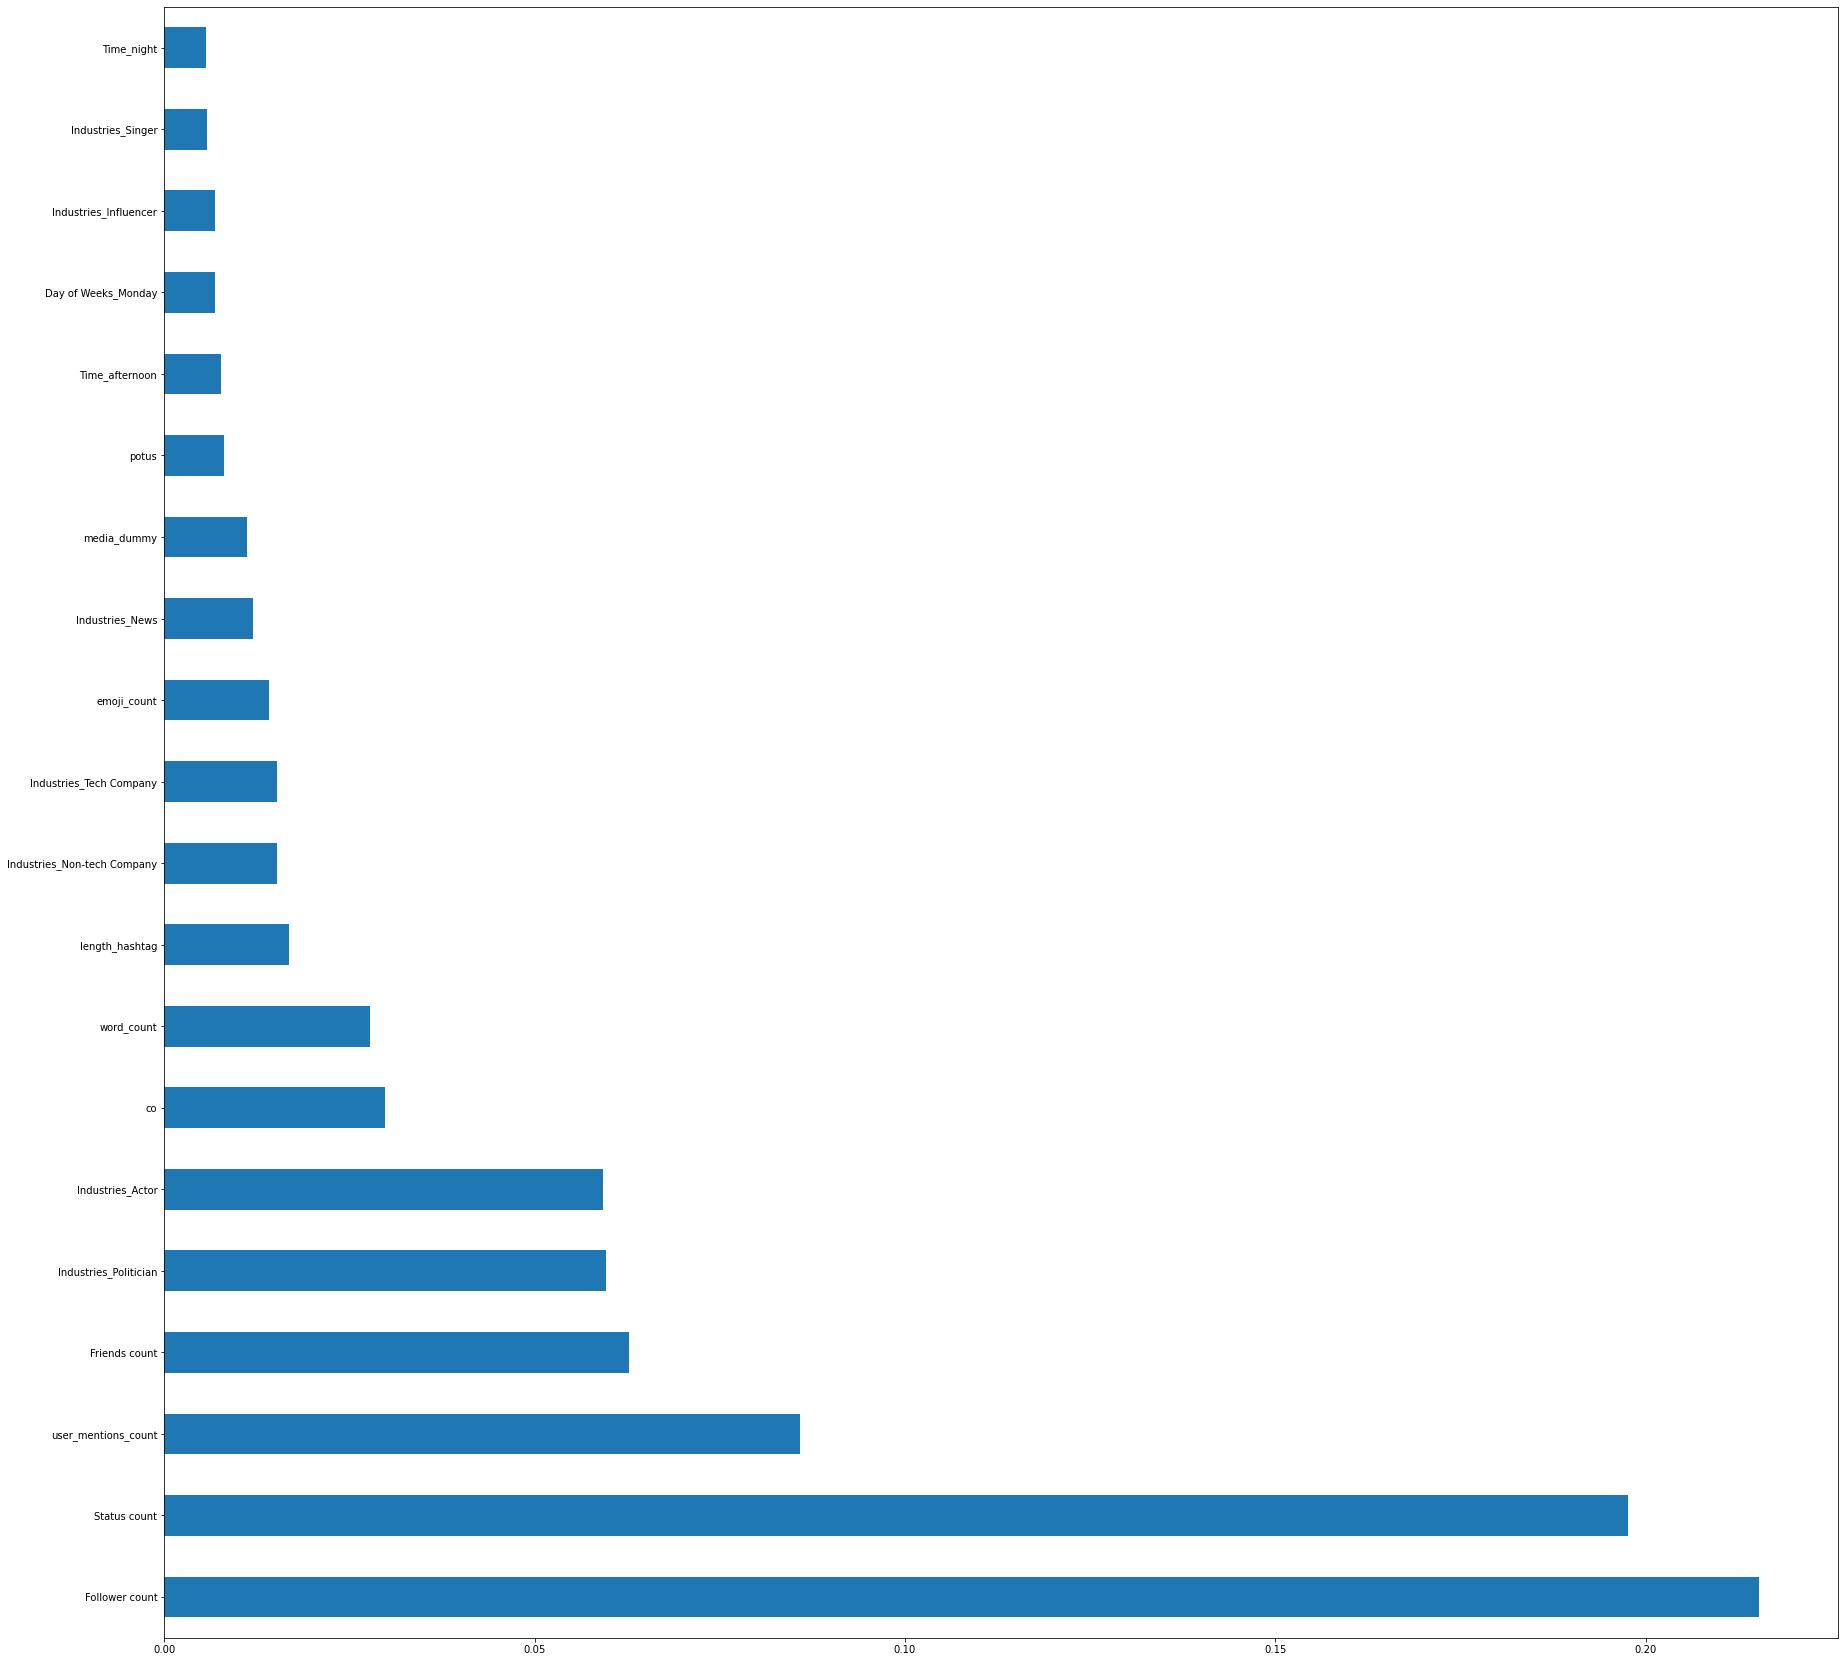

In [464]:
plt.figure(figsize=(30,30))
feat_importances = pd.Series(rf1.feature_importances_,df_train_prep.drop(columns=['Engagement']).columns)
feat_importances.nlargest(20).plot(kind='barh')

In [465]:
print("Model 1 IQR")
print("shape",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("")

y_train_pred=rf1.predict(X_train)
errors_train = abs(y_train_pred - y_train)
mse_train = mean_squared_error(y_train,y_train_pred)
print("--- train set ---")
print('actual data mean',round(np.mean(y_train)))
print('predict data mean',round(np.mean(y_train_pred)))
print('MAE:', round(np.mean(errors_train), 2))
print('MSE:', round(np.mean(mse_train), 2))
print('R-square',round(r2_score(y_train,y_train_pred),2))

print('pred maximum',round(max(y_train_pred)))
print('real maximum',round(max(y_train)))

print('pred',y_train_pred[0:8].astype(int))
print('real',np.array(y_train[0:8]).astype(int))

y_pred=rf1.predict(X_test)
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test,y_pred)
print("")
print("--- test set ---")

print('actual data mean',round(np.mean(y_test)))
print('predict data mean',round(np.mean(y_pred)))
print('MAE:', round(np.mean(errors), 2))
print('MSE:', round(np.mean(mse), 2))
print('R-square',round(r2_score(y_test,y_pred),2))

print('pred maximum',round(max(y_pred)))
print('real maximum',round(max(y_test)))

print('pred',y_pred[0:8].astype(int))
print('real',y_test[0:8].astype(int))


Model 1 IQR
shape (7294, 127) (3126, 127) (7294,) (3126,)

--- train set ---
actual data mean 2023
predict data mean 2008
MAE: 909.1
MSE: 3046824.44
R-square 0.78
pred maximum 15906
real maximum 18292
pred [2111    8  850 5760  118  693  113    8]
real [6213    4 2744 6508   53 1452  174    3]

--- test set ---
actual data mean 2031
predict data mean 1970
MAE: 1172.29
MSE: 5524350.03
R-square 0.6
pred maximum 15064
real maximum 18202
pred [   8   13    8 2332 1936    9    7  671]
real [   5    6    1 1586 1313    6    1  364]


# ElasticNet

In [466]:
reg_enet = ElasticNet()

params = [
  {'alpha': [0, 0.2, 0.2, 0.4, 0.6, 0.8, 1], 
   'l1_ratio': [0, 0.2, 0.2, 0.4, 0.6, 0.8, 1],
   'max_iter': [100, 1000], 
   'random_state': [2020, 2018, 2077, 2222]},
 ]

# Refer https://scikit-learn.org/stable/modules/model_evaluation.html
scoring = {
    "r_square": "r2",
    "mse": "neg_mean_squared_error"
}

In [467]:
def train_model(_clssifier, _params, _scoring, _X_train, _y_train, _cv=5):

    _grid = GridSearchCV(_clssifier, param_grid=_params, refit='mse', scoring=_scoring, cv=_cv)
    _grid.fit(_X_train, _y_train)

    return _grid

In [468]:
#%%time
#grid = train_model(reg_enet, params, scoring, X_train, y_train, _cv=5)

In [469]:
#results = grid.cv_results_ # ผลลัพธ์ออกมาเป็น Dictionary
#df_result = pd.DataFrame(results).sort_values(by="rank_test_mse")

# MSE

In [470]:
#sqrt(df_result[:1]["mean_test_mse"].abs().tolist()[0])

# MODEL2 (Z<3)

In [471]:
def split_data(_df, _label, test_size=0.3, random_state=2020):

    X = _df.drop(columns=[_label]).values
    Y = _df[_label].values

    _X_train, _X_test, _y_train, _y_test = train_test_split(X, Y, test_size=0.3, random_state=2020)
    

    return _X_train, _X_test, _y_train, _y_test

In [472]:
X_train, X_test, y_train, y_test = split_data(df_train_prep1, 'Engagement', test_size=0.3, random_state=2020)

In [473]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8689, 127) (3725, 127) (8689,) (3725,)


In [474]:
rf2 = RandomForestRegressor(n_estimators=100,bootstrap=True,max_depth=10,random_state=2020)
rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=2020)

In [475]:
y_train_pred = rf2.predict(X_train)

y_test_pred = rf2.predict(X_test)

# MSE

In [476]:
mse = mean_squared_error(y_train,y_train_pred)
rmse = sqrt(mse)
print(mse)
print(rmse)

418957867.1158298
20468.46030154271


# R-Squared

In [477]:
print('Train set',r2_score(y_train,y_train_pred))
print('Test set',r2_score(y_test,y_test_pred))

Train set 0.7647898260769359
Test set 0.5160999702810596


# MAE

In [478]:
print('Train set',mean_absolute_error(y_train,y_train_pred))
print('Test set',mean_absolute_error(y_test,y_test_pred))

Train set 7986.416321494259
Test set 10582.335769635823


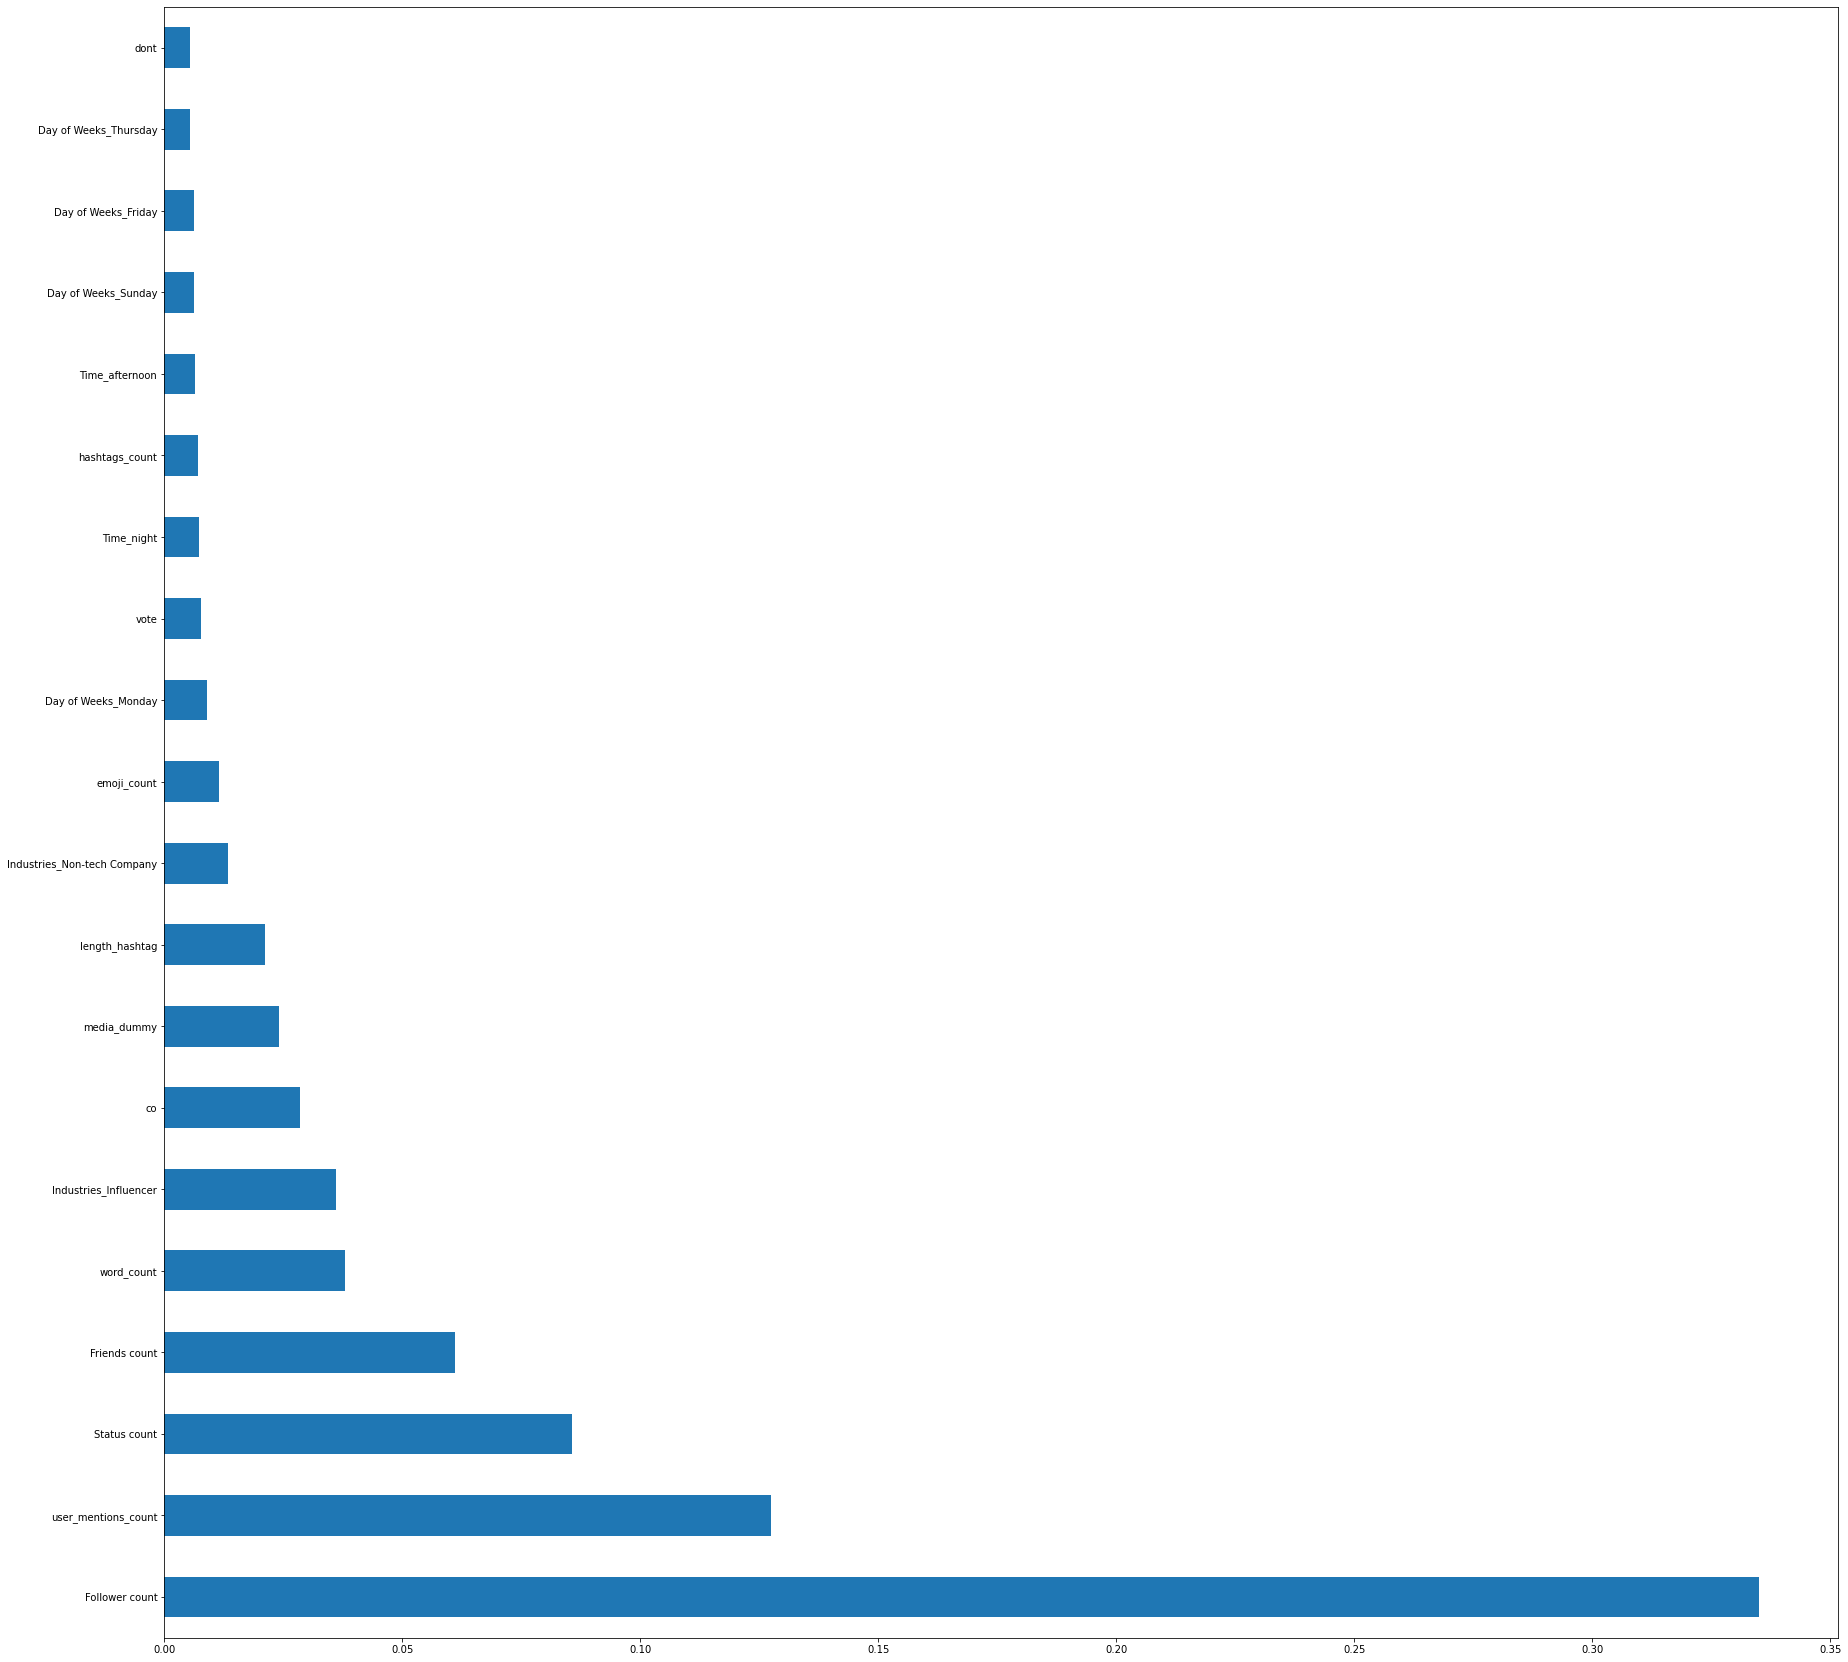

In [479]:
plt.figure(figsize=(30,30))
feat_importances = pd.Series(rf2.feature_importances_,df_train_prep1.drop(columns=['Engagement']).columns)
feat_importances.nlargest(20).plot(kind='barh')

In [480]:
print("Model 2 Cut Z<3")
print("shape",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("")

y_train_pred=rf2.predict(X_train)
errors_train = abs(y_train_pred - y_train)
mse_train = mean_squared_error(y_train,y_train_pred)
print("--- train set ---")
print('actual data mean',round(np.mean(y_train)))
print('predict data mean',round(np.mean(y_train_pred)))
print('MAE:', round(np.mean(errors_train), 2))
print('MSE:', round(np.mean(mse_train), 2))
print('R-square',round(r2_score(y_train,y_train_pred),2))

print('pred maximum',round(max(y_train_pred)))
print('real maximum',round(max(y_train)))

print('pred',y_train_pred[0:8].astype(int))
print('real',np.array(y_train[0:8]).astype(int))

y_pred=rf2.predict(X_test)
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test,y_pred)
print("")
print("--- test set ---")

print('actual data mean',round(np.mean(y_test)))
print('predict data mean',round(np.mean(y_pred)))
print('MAE:', round(np.mean(errors), 2))
print('MSE:', round(np.mean(mse), 2))
print('R-square',round(r2_score(y_test,y_pred),2))

print('pred maximum',round(max(y_pred)))
print('real maximum',round(max(y_test)))

print('pred',y_pred[0:8].astype(int))
print('real',y_test[0:8].astype(int))


Model 2 Cut Z<3
shape (8689, 127) (3725, 127) (8689,) (3725,)

--- train set ---
actual data mean 15070
predict data mean 14853
MAE: 7986.42
MSE: 418957867.12
R-square 0.76
pred maximum 305714
real maximum 332602
pred [29150    16 14901 15721 48939  8447   599   652]
real [13403    19 22327  6471 14689 12247   653    16]

--- test set ---
actual data mean 14891
predict data mean 15050
MAE: 10582.34
MSE: 815423812.4
R-square 0.52
pred maximum 253942
real maximum 329484
pred [  917  2604  3196  3471  3551   282 54411 14855]
real [  395  1017   439  1416  2399   226 71068 16834]


# MODEL2 (Z<2)

In [481]:
X_train, X_test, y_train, y_test = split_data(df_train_prep2, 'Engagement', test_size=0.3, random_state=2020)

In [482]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8598, 127) (3686, 127) (8598,) (3686,)


In [483]:
rf3 = RandomForestRegressor(n_estimators=100,bootstrap=True,max_depth=10,random_state=2020)
rf3.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=2020)

In [484]:
y_train_pred = rf3.predict(X_train)

y_test_pred = rf3.predict(X_test)

# MSE

In [485]:
mse = mean_squared_error(y_train,y_train_pred)
rmse = sqrt(mse)
print(mse)
print(rmse)

244816634.51904655
15646.617350694256


# R-Squared

In [486]:
print('Train set',r2_score(y_train,y_train_pred))
print('Test set',r2_score(y_test,y_test_pred))

Train set 0.7584568760331154
Test set 0.5145272611226471


# MAE

In [487]:
print('Train set',mean_absolute_error(y_train,y_train_pred))
print('Test set',mean_absolute_error(y_test,y_test_pred))

Train set 6323.966101568598
Test set 8773.222521060005


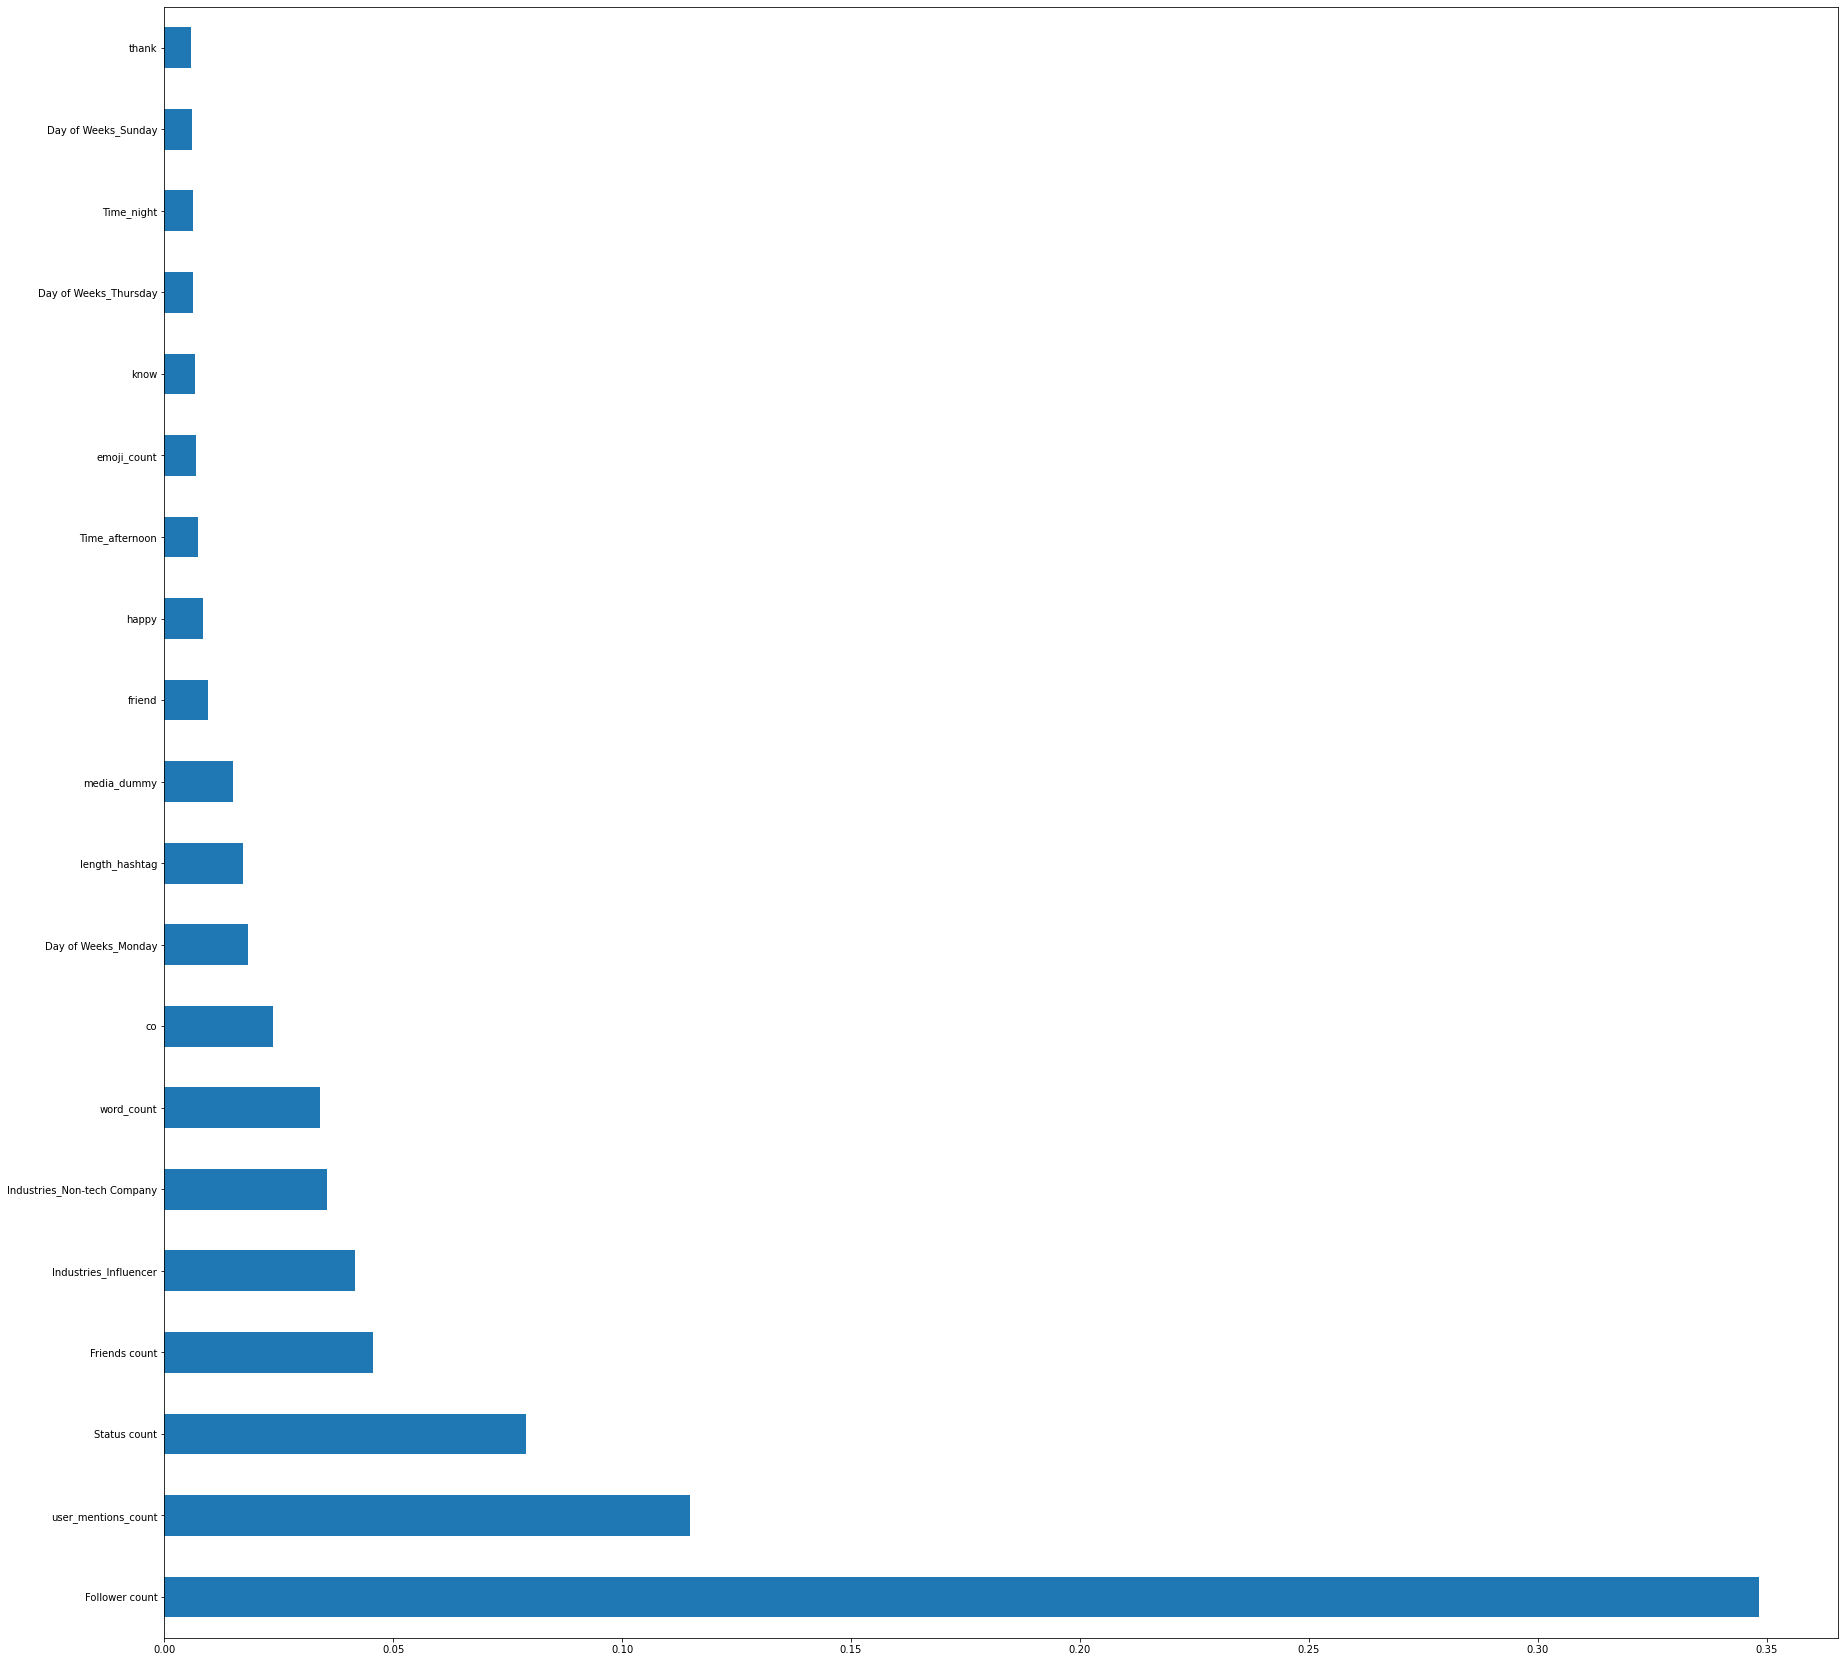

In [488]:
plt.figure(figsize=(30,30))
feat_importances = pd.Series(rf.feature_importances_,df_train_prep2.drop(columns=['Engagement']).columns)
feat_importances.nlargest(20).plot(kind='barh')

In [489]:
print("Model 3 Cut Z<2")
print("shape",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("")

y_train_pred=rf3.predict(X_train)
errors_train = abs(y_train_pred - y_train)
mse_train = mean_squared_error(y_train,y_train_pred)
print("--- train set ---")
print('actual data mean',round(np.mean(y_train)))
print('predict data mean',round(np.mean(y_train_pred)))
print('MAE:', round(np.mean(errors_train), 2))
print('MSE:', round(np.mean(mse_train), 2))
print('R-square',round(r2_score(y_train,y_train_pred),2))

print('pred maximum',round(max(y_train_pred)))
print('real maximum',round(max(y_train)))

print('pred',y_train_pred[0:8].astype(int))
print('real',np.array(y_train[0:8]).astype(int))

y_pred=rf3.predict(X_test)
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test,y_pred)
print("")
print("--- test set ---")

print('actual data mean',round(np.mean(y_test)))
print('predict data mean',round(np.mean(y_pred)))
print('MAE:', round(np.mean(errors), 2))
print('MSE:', round(np.mean(mse), 2))
print('R-square',round(r2_score(y_test,y_pred),2))

print('pred maximum',round(max(y_pred)))
print('real maximum',round(max(y_test)))

print('pred',y_pred[0:8].astype(int))
print('real',y_test[0:8].astype(int))


Model 3 Cut Z<2
shape (8598, 127) (3686, 127) (8598,) (3686,)

--- train set ---
actual data mean 12181
predict data mean 12035
MAE: 6323.97
MSE: 244816634.52
R-square 0.76
pred maximum 199659
real maximum 230446
pred [   560 124488   1515   1971  60436   2939  32719  37960]
real [    96 161345    573   1050 131234    826  50690  68687]

--- test set ---
actual data mean 12358
predict data mean 11415
MAE: 8773.22
MSE: 507650996.68
R-square 0.51
pred maximum 183831
real maximum 228627
pred [  181 59551   181   181    19  3395   905   905]
real [    57 134919     13    319      6    220    289    501]


# ___________ ___________ ___________ ___________ ___________ ______________________ ___________ ___________ ___________ ___________ ___________ ___________ ___________ ___________ ___________ ___________ ___________ ___________ ___________ ___________

# Model Improvement

In [490]:
#Exclude Outlier (เอาออกทั้งหมด ไม่สนใจ Predict Data ที่เกินช่วงนี้เลย เอาออกทั้ง Train และ Test)
z_scores = stats.zscore(df_model1['Engagement'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df12 = df_model1[filtered_entries]

In [491]:
X_train, X_test, y_train, y_test = split_data(df12, 'Engagement', test_size=0.3, random_state=2020)

# Initial model

In [492]:
model4 = RandomForestRegressor(n_estimators=100,bootstrap=True,max_depth=10,random_state=2020)
model4.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=2020)

In [493]:
print("Model 4 Cut Z<3 without normalization") #Scaling is not necessary for random forests
print("shape",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("")

y_train_pred=model4.predict(X_train)
errors_train = abs(y_train_pred - y_train)
mse_train = mean_squared_error(y_train,y_train_pred)
print("--- train set ---")
print('actual data mean',round(np.mean(y_train)))
print('predict data mean',round(np.mean(y_train_pred)))
print('MAE:', round(np.mean(errors_train), 2))
print('MSE:', round(np.mean(mse_train), 2))
print('R-square',round(r2_score(y_train,y_train_pred),2))

print('pred maximum',round(max(y_train_pred)))
print('real maximum',round(max(y_train)))

print('pred',y_train_pred[0:8].astype(int))
print('real',np.array(y_train[0:8]).astype(int))

y_pred=model4.predict(X_test)
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test,y_pred)
print("")
print("--- test set ---")

print('actual data mean',round(np.mean(y_test)))
print('predict data mean',round(np.mean(y_pred)))
print('MAE:', round(np.mean(errors), 2))
print('MSE:', round(np.mean(mse), 2))
print('R-square',round(r2_score(y_test,y_pred),2))

print('pred maximum',round(max(y_pred)))
print('real maximum',round(max(y_test)))

print('pred',y_pred[0:8].astype(int))
print('real',y_test[0:8].astype(int))

Model 4 Cut Z<3 without normalization
shape (8689, 127) (3725, 127) (8689,) (3725,)

--- train set ---
actual data mean 15070
predict data mean 14852
MAE: 7985.04
MSE: 418863518.54
R-square 0.76
pred maximum 305714
real maximum 332602
pred [27286    16 14901 15721 48939  8447   599   652]
real [13403    19 22327  6471 14689 12247   653    16]

--- test set ---
actual data mean 14891
predict data mean 15047
MAE: 10579.95
MSE: 815516185.52
R-square 0.52
pred maximum 253942
real maximum 329484
pred [  917  2604  3196  3471  3551   282 54411 14855]
real [  395  1017   439  1416  2399   226 71068 16834]


In [494]:
#Try Z score < 2 
z_scores = stats.zscore(df_model1['Engagement'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2)
df12_2 = df_model1[filtered_entries]

In [495]:
#ลองใช้เฉพาะ train, test ใช้อันเดียวกับ model ด้านบนทดสอบ
X_train2, X_test2, y_train2, y_test2 = split_data(df12_2, 'Engagement', test_size=0.3, random_state=2020)

In [496]:
model5 = RandomForestRegressor(n_estimators=100,bootstrap=True,max_depth=10,random_state=2020)
model5.fit(X_train2, y_train2)

RandomForestRegressor(max_depth=10, random_state=2020)

In [497]:
print("Model 5 Cut Z<2")
print("shape",X_train2.shape, X_test.shape, y_train2.shape, y_test.shape)
print("")

y_train_pred=model5.predict(X_train2)
errors_train = abs(y_train_pred - y_train2)
mse_train = mean_squared_error(y_train2,y_train_pred)
print("--- train set ---")
print('actual data mean',round(np.mean(y_train2)))
print('predict data mean',round(np.mean(y_train_pred)))
print('MAE:', round(np.mean(errors_train), 2))
print('MSE:', round(np.mean(mse_train), 2))
print('R-square',round(r2_score(y_train2,y_train_pred),2))

print('pred maximum',round(max(y_train_pred)))
print('real maximum',round(max(y_train2)))

print('pred',y_train_pred[0:8].astype(int))
print('real',np.array(y_train[0:8]).astype(int))

y_pred=model5.predict(X_test)
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test,y_pred)
print("")
print("--- test set ---")

print('actual data mean',round(np.mean(y_test2)))
print('predict data mean',round(np.mean(y_pred)))
print('MAE:', round(np.mean(errors), 2))
print('MSE:', round(np.mean(mse), 2))
print('R-square',round(r2_score(y_test,y_pred),2))

print('pred maximum',round(max(y_pred)))
print('real maximum',round(max(y_test)))

print('pred',y_pred[0:8].astype(int))
print('real',y_test[0:8].astype(int))

##MAE in the same test set decrease and r-square improve < choose this model to gridsearchCV

Model 5 Cut Z<2
shape (8598, 127) (3725, 127) (8598,) (3725,)

--- train set ---
actual data mean 12181
predict data mean 12033
MAE: 6322.46
MSE: 244716879.81
R-square 0.76
pred maximum 199659
real maximum 230446
pred [   560 124488   1515   1971  60436   2939  32719  37960]
real [13403    19 22327  6471 14689 12247   653    16]

--- test set ---
actual data mean 12358
predict data mean 12867
MAE: 8700.1
MSE: 678869634.36
R-square 0.6
pred maximum 192843
real maximum 329484
pred [  950  2018  3190  3175  3406   383 54999 14955]
real [  395  1017   439  1416  2399   226 71068 16834]


# Parameter tuning (GridSearch)

In [498]:
def GridSearch_CV(X_train, y_train):
    estimator = RandomForestRegressor()
    params = { 
            "n_estimators"      : [50,100,500,1000],
            "max_features"      : ["auto",20,50],
            "max_depth"         : [10,40,80,100],
            "bootstrap"         : [True],
            }

    grid = GridSearchCV(estimator, params, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [420]:
def SC(X_train, X_test, y_train, y_test, best_params):
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_pred = estimator.predict(X_test)
    print("R2 :",r2_score(y_test,y_pred))
    print("MAE",mean_absolute_error(y_test,y_pred))
    return y_test,y_pred

In [421]:
#ลอง GridSearch โดยใช้ Train ของ Z<2 better result on test set
for i in range(5):
    print("Loop: " , i)
    print("--------------")
    X_train, X_test, y_train, y_test = split_data(df12, 'Engagement', test_size=0.3, random_state=2020)
    X_train2, X_test2, y_train2, y_test2 = split_data(df12_2, 'Engagement', test_size=0.3, random_state=2020)
    best_score, best_params = GridSearch_CV(X_train2, y_train2)
    y_test , y_pred = SC(X_train2, X_test, y_train2, y_test, best_params)
    print("Best Score:" ,best_score)
    print("Best params:",best_params)

Loop:  0
--------------
R2 : 0.5896616329388653
MAE 8827.640014237686
Best Score: 0.5425839697608701
Best params: {'bootstrap': True, 'max_depth': 10, 'max_features': 50, 'n_estimators': 1000}
Loop:  1
--------------
R2 : 0.5892986143332333
MAE 8840.750846158715
Best Score: 0.5412964883256253
Best params: {'bootstrap': True, 'max_depth': 10, 'max_features': 50, 'n_estimators': 500}
Loop:  2
--------------
R2 : 0.5887190538348446
MAE 8860.163424460574
Best Score: 0.5422318387516105
Best params: {'bootstrap': True, 'max_depth': 10, 'max_features': 50, 'n_estimators': 500}
Loop:  3
--------------
R2 : 0.591871853579534
MAE 8808.047093997822
Best Score: 0.5413111497073377
Best params: {'bootstrap': True, 'max_depth': 10, 'max_features': 50, 'n_estimators': 500}
Loop:  4
--------------
R2 : 0.5880666991085703
MAE 8835.01521700642
Best Score: 0.5416560553195031
Best params: {'bootstrap': True, 'max_depth': 10, 'max_features': 50, 'n_estimators': 1000}


# Model

In [499]:
model5_1 = RandomForestRegressor(n_estimators=500,bootstrap=True,max_depth=10,max_features=50,random_state=2020)
model5_1.fit(X_train2, y_train2)

model5_2 = RandomForestRegressor(n_estimators=1000,bootstrap=True,max_depth=10,max_features=50,random_state=2020)
model5_2.fit(X_train2, y_train2)

RandomForestRegressor(max_depth=10, max_features=50, n_estimators=1000,
                      random_state=2020)

In [501]:
print("Model 5-1 After Improve")
print("shape",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("")

y_train_pred=model5_1.predict(X_train2)
errors_train = abs(y_train_pred - y_train2)
mse_train = mean_squared_error(y_train2,y_train_pred)
print("--- train set ---")
print('actual data mean',round(np.mean(y_train2)))
print('predict data mean',round(np.mean(y_train_pred)))
print('MAE:', round(np.mean(errors_train), 2))
print('MSE:', round(np.mean(mse_train), 2))
print('R-square',round(r2_score(y_train2,y_train_pred),2))

print('pred maximum',round(max(y_train_pred)))
print('real maximum',round(max(y_train2)))

print('pred',y_train_pred[0:8].astype(int))
print('real',np.array(y_train[0:8]).astype(int))

y_pred=model5_1.predict(X_test)
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test,y_pred)
print("")
print("--- test set ---")

print('actual data mean',round(np.mean(y_test)))
print('predict data mean',round(np.mean(y_pred)))
print('MAE:', round(np.mean(errors), 2))
print('MSE:', round(np.mean(mse), 2))
print('R-square',round(r2_score(y_test,y_pred),2))

print('pred maximum',round(max(y_pred)))
print('real maximum',round(max(y_test)))

print('pred',y_pred[0:8].astype(int))
print('real',y_test[0:8].astype(int))

#Overfit

Model 5-1 After Improve
shape (8689, 127) (3725, 127) (8689,) (3725,)

--- train set ---
actual data mean 12181
predict data mean 12052
MAE: 6352.15
MSE: 233297574.98
R-square 0.77
pred maximum 197014
real maximum 230446
pred [   774 117631   1550   1773  64072   2031  37921  44931]
real [13403    19 22327  6471 14689 12247   653    16]

--- test set ---
actual data mean 14891
predict data mean 12805
MAE: 8806.92
MSE: 688365672.85
R-square 0.59
pred maximum 168746
real maximum 329484
pred [ 1341  1961  4021  4020  4267   778 54671 15720]
real [  395  1017   439  1416  2399   226 71068 16834]


Text(0.5, 1.0, 'Visualizing Important Features')

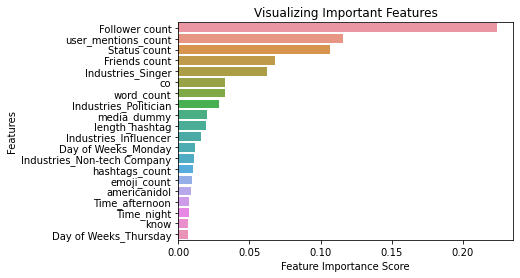

In [502]:
#Important features
X = df_model1.drop(columns='Engagement')
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

feature_imp = pd.Series(model5_1.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp[0:20]

sns.barplot(x=feature_imp[0:20], y=feature_imp[0:20].index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")